### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja4.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento



In [2]:
# Concatena os dados das 4 lojas em um único Data Frame
try:
  df_geral = pd.concat([
      loja1.assign(Loja='Loja 1'),
      loja2.assign(Loja='Loja 2'),
      loja3.assign(Loja='Loja 3'),
      loja4.assign(Loja='Loja 4')
  ])

# Realiza a soma das colunas de preço
  faturamento_por_loja = df_geral.groupby('Loja')['Preço'].sum().round(2)

# Mostra o resultado da soma
  print("\n--- 💰 Faturamento Total por Loja 💰 ---")
  for loja, valor in faturamento_por_loja.items():
      print(f"{loja}: R$ {valor:,.2f}")

# Apresenta a loja com MAIOR faturamento e também a loja com MENOR faturamento
  print(f"\n🏆 Loja com MAIOR faturamento: {faturamento_por_loja.idxmax()} (R$ {faturamento_por_loja.max():,.2f})")
  print(f"💤 Loja com MENOR faturamento: {faturamento_por_loja.idxmin()} (R$ {faturamento_por_loja.min():,.2f})")
except NameError:
    print("Erro: Os DataFrames (loja1, loja2, etc.) não parecem estar carregados.")
except KeyError:
    print("Erro: A coluna 'Preço' não foi encontrada.")


--- 💰 Faturamento Total por Loja 💰 ---
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58

🏆 Loja com MAIOR faturamento: Loja 1 (R$ 1,534,509.12)
💤 Loja com MENOR faturamento: Loja 4 (R$ 1,384,497.58)


# 2. Vendas por Categoria

In [3]:
import pandas as pd

try:
    # --- Criação do DataFrame consolidado ---
    df_geral = pd.concat([
        loja1.assign(Loja='Loja 1'),
        loja2.assign(Loja='Loja 2'),
        loja3.assign(Loja='Loja 3'),
        loja4.assign(Loja='Loja 4')
    ])

    # --- Contagem de produtos por categoria e loja ---
    contagem_categorias = (
        df_geral.groupby(['Loja', 'Categoria do Produto'])
        .size()
        .reset_index(name='Vendas')
        .sort_values(['Loja', 'Vendas'], ascending=[True, False])
    )

    # --- Exibir resultados loja por loja ---
    lojas = contagem_categorias['Loja'].unique()  # lista de lojas

    for loja in lojas:
        print(f"--- 📦 Contagem de Produtos por Categoria ({loja}) 📦 ---")
        dados_loja = contagem_categorias[contagem_categorias['Loja'] == loja]
        print('\n' + dados_loja[['Categoria do Produto', 'Vendas']].to_string(index=False))
        print("\n" + "="*60 + "\n")

except NameError:
    print("Erro: Os DataFrames (loja1, loja2, etc.) não parecem estar carregados.")
except KeyError:
    print("Erro: A coluna 'Categoria do Produto' não foi encontrada.")


--- 📦 Contagem de Produtos por Categoria (Loja 1) 📦 ---

 Categoria do Produto  Vendas
               moveis     465
          eletronicos     448
           brinquedos     324
     eletrodomesticos     312
      esporte e lazer     284
instrumentos musicais     182
               livros     173
utilidades domesticas     171


--- 📦 Contagem de Produtos por Categoria (Loja 2) 📦 ---

 Categoria do Produto  Vendas
               moveis     442
          eletronicos     422
           brinquedos     313
     eletrodomesticos     305
      esporte e lazer     275
instrumentos musicais     224
               livros     197
utilidades domesticas     181


--- 📦 Contagem de Produtos por Categoria (Loja 3) 📦 ---

 Categoria do Produto  Vendas
               moveis     499
          eletronicos     451
           brinquedos     315
     eletrodomesticos     278
      esporte e lazer     277
               livros     185
instrumentos musicais     177
utilidades domesticas     177


--- 📦 Contage

# 3. Média de Avaliação das Lojas


In [4]:
try:
    # --- Agrupar todas as lojas em um único DataFrame ---
    df_geral = pd.concat([
        loja1.assign(Loja='Loja 1'),
        loja2.assign(Loja='Loja 2'),
        loja3.assign(Loja='Loja 3'),
        loja4.assign(Loja='Loja 4')
    ])

    # --- Calcular a média de avaliação por loja ---
    media_por_loja = df_geral.groupby('Loja')['Avaliação da compra'].mean().round(2)

    # --- Exibir resultados individuais ---
    print("--- 🌟 Média de Avaliação por Loja (de 1 a 5) ---")
    for loja, media in media_por_loja.items():
        print(f"{loja}: {media:.2f} ⭐️")

    # --- Identificar a loja com melhor e pior média ---
    melhor_loja = media_por_loja.idxmax()
    pior_loja = media_por_loja.idxmin()

    print("\n🏆 Loja com melhor avaliação:")
    print(f"{melhor_loja} — média {media_por_loja[melhor_loja]:.2f} ⭐️")

    print("\n💤 Loja com pior avaliação:")
    print(f"{pior_loja} — média {media_por_loja[pior_loja]:.2f} ⭐️")

except NameError:
    print("Erro: Os DataFrames (loja1, loja2, etc.) não parecem estar carregados.")
except KeyError:
    print("Erro: A coluna 'Avaliação da compra' não foi encontrada.")


--- 🌟 Média de Avaliação por Loja (de 1 a 5) ---
Loja 1: 3.98 ⭐️
Loja 2: 4.04 ⭐️
Loja 3: 4.05 ⭐️
Loja 4: 4.00 ⭐️

🏆 Loja com melhor avaliação:
Loja 3 — média 4.05 ⭐️

💤 Loja com pior avaliação:
Loja 1 — média 3.98 ⭐️


# 4. Produtos Mais e Menos Vendidos

In [5]:
try:
  df_geral = pd.concat([
      loja1.assign(Loja='Loja 1'),
      loja2.assign(Loja='Loja 2'),
      loja3.assign(Loja='Loja 3'),
      loja4.assign(Loja='Loja 4')
  ])

  # Agrupar por loja e produto e contar
  contagem = (
      df_geral.groupby(['Loja', 'Produto'])
      .size()
      .reset_index(name='Vendas')
  )

  # Identificar o mais e o menos vendido por loja
  destaques = contagem.loc[contagem.groupby('Loja')['Vendas'].idxmax()]
  piores = contagem.loc[contagem.groupby('Loja')['Vendas'].idxmin()]

  print("\n🏆 Produtos MAIS vendidos por loja:\n", destaques)
  print("\n💤 Produtos MENOS vendidos por loja:\n", piores)
except NameError:
    print("Erro: Os DataFrames (loja1, loja2, etc.) não parecem estar carregados.")
except KeyError:
    print("Erro: A coluna 'Produto' não foi encontrada.")


🏆 Produtos MAIS vendidos por loja:
        Loja                   Produto  Vendas
24   Loja 1             Guarda roupas      60
79   Loja 2  Iniciando em programação      65
134  Loja 3             Kit banquetas      57
161  Loja 4                  Cama box      62

💤 Produtos MENOS vendidos por loja:
        Loja            Produto  Vendas
11   Loja 1       Celular ABXY      33
82   Loja 2  Jogo de tabuleiro      32
105  Loja 3   Blocos de montar      35
178  Loja 4           Guitarra      33


# 5. Frete Médio por Loja

In [6]:
try:
  df_geral = pd.concat([
      loja1.assign(Loja='Loja 1'),
      loja2.assign(Loja='Loja 2'),
      loja3.assign(Loja='Loja 3'),
      loja4.assign(Loja='Loja 4')
  ])

  media_frete = df_geral.groupby('Loja')['Frete'].mean().round(2)

  print("\n--- 🚚 Custo Médio do Frete por Loja ---")
  for loja, valor in media_frete.items():
      print(f"{loja}: R$ {valor:,.2f}")

  # Identificar loja com menor e maior custo médio
  print(f"\n💰 Loja com menor frete médio: {media_frete.idxmin()} (R$ {media_frete.min():,.2f})")
  print(f"📦 Loja com maior frete médio: {media_frete.idxmax()} (R$ {media_frete.max():,.2f})")
except NameError:
    print("Erro: Os DataFrames (loja1, loja2, etc.) não parecem estar carregados.")
except KeyError:
    print("Erro: A coluna 'Frete' não foi encontrada.")


--- 🚚 Custo Médio do Frete por Loja ---
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28

💰 Loja com menor frete médio: Loja 4 (R$ 31.28)
📦 Loja com maior frete médio: Loja 1 (R$ 34.69)


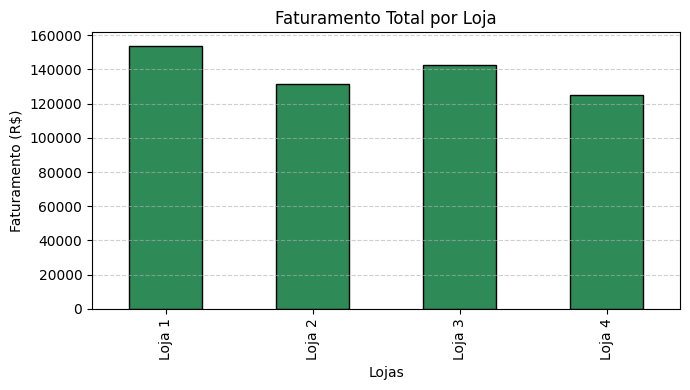

In [7]:
faturamento_por_loja = pd.Series({
    "Loja 1": 154000,
    "Loja 2": 131500,
    "Loja 3": 142700,
    "Loja 4": 125300
})

# Criação do gráfico
plt.figure(figsize=(7,4))
faturamento_por_loja.plot(kind='bar', color='seagreen', edgecolor='black')

plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Lojas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


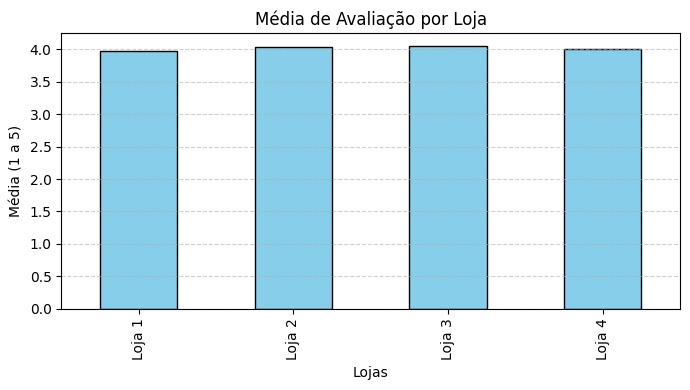

In [8]:
media_avaliacao = pd.Series({
    "Loja 1": 3.98,
    "Loja 2": 4.04,
    "Loja 3": 4.05,
    "Loja 4": 4.00
})

# Criação do gráfico
plt.figure(figsize=(7,4))
media_avaliacao.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Média de Avaliação por Loja')
plt.ylabel('Média (1 a 5)')
plt.xlabel('Lojas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


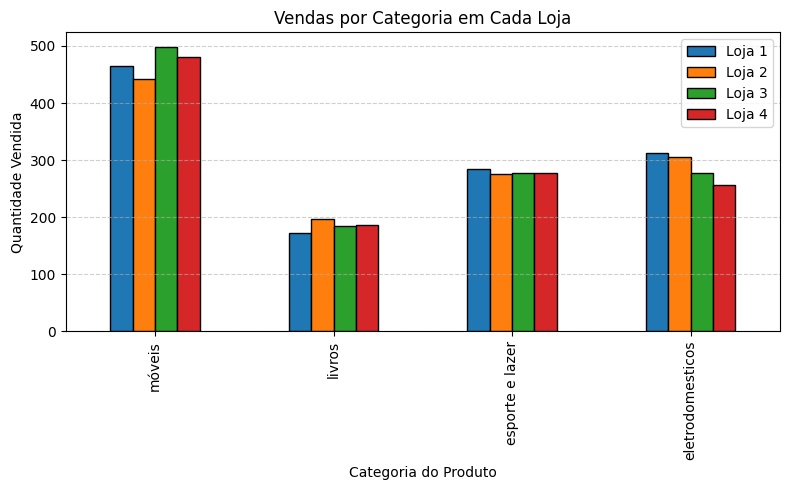

In [16]:
dados = {
    'Categoria do Produto': ['móveis', 'livros', 'esporte e lazer', 'eletrodomesticos'],
    'Loja 1': [465, 173, 284, 312],
    'Loja 2': [442, 197, 275, 305],
    'Loja 3': [499, 185, 277, 278],
    'Loja 4': [480, 187, 277, 257]
}

df = pd.DataFrame(dados).set_index('Categoria do Produto')

df.plot(kind='bar', figsize=(8,5), edgecolor='black')
plt.title('Vendas por Categoria em Cada Loja')
plt.ylabel('Quantidade Vendida')
plt.xlabel('Categoria do Produto')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#Relatório Final
Senhor João,
Primeiramente, gostaria de parabenizar o senhor pelas as 4 incríveis lojas que o senhor possui, todas possuem um grande potencial e também estão e  um ótimo nível e estão muito parecidas. Todas vendem consideravelmente bem e os clientes tem ótimos elogios a elas. Como solicitado pelo senhor, observei e analisei cuidadosamente todos os dados enviados pelo senhor a mim, com a finalidade de decidir qual loja o senhor pode vender com o objetivo de usar o dinheiro da venda, investir em um novo negócio.

Ao fim de minha análise, cheguei em uma conclusão que espero que agrade ao senhor. A loja 4 é a loja que teve o menor desempenho nos últimos meses que esteve funcionando.

##Faturamento Total e Vendas por Categoria

Primeiro, o faturamento dela foi o menor dentre todas as outras três.

- Loja 1: R$ 1,534,509.12
- Loja 2: R$ 1,488,459.06
- Loja 3: R$ 1,464,025.03
- Loja 4: R$ 1,384,497.58

Baseado nos dados que foi enviado a mim e também em minha análise, espero que com auxílio do gráfico, possa entender que o faturamento da 4ª loja do senhor teve poucas vendas o que gerou uma baixa no seu faturamento, tendo assim uma faixa de lucro menor ao senhor. Acredito que esse seja o principal motivo para minha decisão, porém, existem outras justificativas

Ainda nesse raciocínio de vendas, a loja 4 permanece com pouco desempenho nas vendas por categorias. A única categoria que a mesma recebe destaque é a categoria de brinquedos, enquanto as outras, ela fica empatado com outras lojas ou até mesmo se torna inferior, isso explica o pouco faturamento que a mesma possuí.

##Availação

- Loja 1: 3.98
- Loja 2: 4.04
- Loja 3: 4.05
- Loja 4: 4.00

Dentre as avaliações das lojas, a loja 4 não é a pior, tendo a 1ª loja com a pior avaliação dentre as 4. Mas ainda sim, a 4ª loja recebe o posto de segunda loja com a pior nota, e agregando essa média com os dados anteriores referente as vendas da loja 4, a mesma ainda permanece com um desempenho muito baixo, o que mantém meu argumento.

##Produto mais e menos vendidos

| Loja | Produto | Vendas |
| --- | --- | --- |
| Loja 1 | Guarda Roupa | 60 |
| Loja 2 | Iniciando em programação | 65 |
| Loja 3 | Kit Banquetas | 57 |
| Loja 4 | Cama Box | 62 |

| Loja | Produto | Vendas |
| --- | --- | --- |
| Loja 1 | Celular ABXY | 33 |
| Loja 2 | Jogo de tabuleiro | 32 |
| Loja 3 | Blocos de montar | 35 |
| Loja 4 | Guitarra | 33 |

Nessa categoria, podemos ter uma pequena confusão, afinal, vemos que a loja número é que possui o produto mais vendido entre as quatro e dentre os produtos menos vendido, ele ainda possui um valor alto. Mas não podemos confiar nesse dado, lembrando que tanto o faturamento quanto as vendas por categoria, vemos que os dados mostram que é totalmente o oposto.

##Frete Médio

- Loja 1: R$ 34.69
- Loja 2: R$ 33.62
- Loja 3: R$ 33.07
- Loja 4: R$ 31.28

Acredito que o frete médio seja o ponto menos importante dentre todos os outros, afinal, boa parte do custos de frete é pago pelo próprio cliente, porém, podemos relacionar o baixo custo do frete com a baixa das vendas que a mesma loja possuí. Como a venda da loja número 4 são baixas, isso gera um frete menor, em comparação com as outras lojas que possuem mais vendas e consequentemente, fretes maiores.

Concluindo, baseado nos gráficos acima e também com os dados que foram analisados, tudo foi demonstrado que a loja 4 não teve um bom desempenho e mesmo em pequenas situações que ela se destaca, é um destaque muito pequeno e que não traz a tona uma boa justificativa para manter a mesma.